In [27]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
users_data_path = r"C:\Users\soura\Desktop\DATA SCIENCE\Fraud Detection\data\users_data.csv"
transactions_data_path = r"C:\Users\soura\Desktop\DATA SCIENCE\Fraud Detection\data\transactions_data.csv"
card_data_path = r"C:\Users\soura\Desktop\DATA SCIENCE\Fraud Detection\data\cards_data.csv"
mcc_codes_path = r"C:\Users\soura\Desktop\DATA SCIENCE\Fraud Detection\data\mcc_codes.json"
fraud_labels_path = r"C:\Users\soura\Desktop\DATA SCIENCE\Fraud Detection\data\train_fraud_labels.json"

In [29]:
# Load the JSON data from the file
with open(mcc_codes_path, 'r') as file:
    mcc_codes = json.load(file)

# Convert the dictionary into a DataFrame
mcc_codes_df = pd.DataFrame(list(mcc_codes.items()), columns=['MCC Code', 'Category'])

In [30]:
# Load the JSON data from the file
with open(fraud_labels_path, 'r') as file:
    fraud_labels = json.load(file)

# Extract the dictionary from the "target" key (if that's the case)
fraud_labels = fraud_labels['target']

# Convert the dictionary into a DataFrame
fraud_labels_df = pd.DataFrame(list(fraud_labels.items()), columns=['Transaction ID', 'Fraud Status'])


In [31]:
users_data_df = pd.read_csv(users_data_path)
transactions_data_df = pd.read_csv(transactions_data_path)
card_data_df = pd.read_csv(card_data_path)

In [32]:
users_data_df.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [33]:
transactions_data_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [34]:
card_data_df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [35]:
mcc_codes_df.head()

,MCC Code,Category
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees


In [36]:
fraud_labels_df.sample(5)

,Transaction ID,Fraud Status
5726833,11818118,No
76506,13487929,No
3338453,23687053,No
5313221,11239846,No
4755264,17745162,No


In [37]:
users_data_df.columns

Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [38]:
transactions_data_df.columns

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors'],
      dtype='object')

In [39]:
card_data_df.columns

Index(['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web'],
      dtype='object')

In [40]:
fraud_labels_df.columns

Index(['Transaction ID', 'Fraud Status'], dtype='object')

In [41]:
mcc_codes_df.columns

Index(['MCC Code', 'Category'], dtype='object')

In [42]:
users_data_df.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [43]:
transactions_data_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [44]:
card_data_df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [45]:
# Renaming in users_data_df
users_data_df.rename(columns={'id': 'client_id'}, inplace=True)

# Renaming in card_data_df
card_data_df.rename(columns={'id': 'card_id'}, inplace=True)

# Renaming in transactions_data_df
transactions_data_df.rename(columns={'id': 'transaction_id', 'client_id': 'client_id', 'card_id': 'card_id'}, inplace=True)

# Renaming in fraud_labels_df
fraud_labels_df.rename(columns={'Transaction ID': 'transaction_id', 'Fraud Status': 'fraud_label'}, inplace=True)

# Renaming in mcc_codes_df
mcc_codes_df.rename(columns={'MCC Code': 'mcc', 'Category': 'merchant_category'}, inplace=True)


In [46]:
# Checking the column names after renaming
print(users_data_df.columns)
print(transactions_data_df.columns)
print(card_data_df.columns)
print(fraud_labels_df.columns)
print(mcc_codes_df.columns)

Index(['client_id', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'gender', 'address', 'latitude', 'longitude',
       'per_capita_income', 'yearly_income', 'total_debt', 'credit_score',
       'num_credit_cards'],
      dtype='object')
Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors'],
      dtype='object')
Index(['card_id', 'client_id', 'card_brand', 'card_type', 'card_number',
       'expires', 'cvv', 'has_chip', 'num_cards_issued', 'credit_limit',
       'acct_open_date', 'year_pin_last_changed', 'card_on_dark_web'],
      dtype='object')
Index(['transaction_id', 'fraud_label'], dtype='object')
Index(['mcc', 'merchant_category'], dtype='object')


In [47]:
users_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [48]:
users_data_df.isnull().sum()

client_id            0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

## DATA EXPLORATION ON USERS DATA

In [63]:
users_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   client_id          2000 non-null   int64   
 1   current_age        2000 non-null   int64   
 2   retirement_age     2000 non-null   int64   
 3   birth_year         2000 non-null   int64   
 4   birth_month        2000 non-null   int64   
 5   gender             2000 non-null   object  
 6   address            2000 non-null   object  
 7   latitude           2000 non-null   float64 
 8   longitude          2000 non-null   float64 
 9   per_capita_income  2000 non-null   int64   
 10  yearly_income      2000 non-null   int64   
 11  total_debt         2000 non-null   int64   
 12  credit_score       2000 non-null   int64   
 13  num_credit_cards   2000 non-null   int64   
 14  income_category    2000 non-null   category
dtypes: category(1), float64(2), int64(10), object(2)
memory

In [50]:
# Inspect the first few rows of the problematic columns
print(users_data_df['yearly_income'].head())
print(users_data_df['per_capita_income'].head())
print(users_data_df['total_debt'].head())

0     $59696
1     $77254
2     $33483
3    $249925
4    $109687
Name: yearly_income, dtype: object
0     $29278
1     $37891
2     $22681
3    $163145
4     $53797
Name: per_capita_income, dtype: object
0    $127613
1    $191349
2       $196
3    $202328
4    $183855
Name: total_debt, dtype: object


In [51]:
# Remove non-numeric characters (e.g., '$', ',', etc.)
users_data_df['yearly_income'] = users_data_df['yearly_income'].replace({r'[^\d.]': ''}, regex=True)
users_data_df['per_capita_income'] = users_data_df['per_capita_income'].replace({r'[^\d.]': ''}, regex=True)
users_data_df['total_debt'] = users_data_df['total_debt'].replace({r'[^\d.]': ''}, regex=True)

In [52]:
# Convert the columns to numeric again
users_data_df['yearly_income'] = pd.to_numeric(users_data_df['yearly_income'], errors='coerce')
users_data_df['per_capita_income'] = pd.to_numeric(users_data_df['per_capita_income'], errors='coerce')
users_data_df['total_debt'] = pd.to_numeric(users_data_df['total_debt'], errors='coerce')

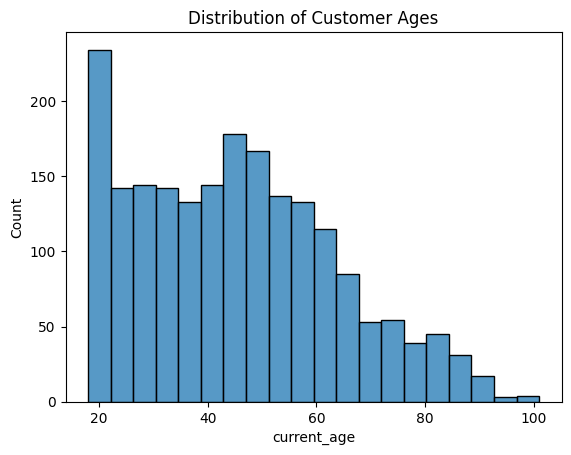

In [54]:
# Distribution of age
sns.histplot(users_data_df['current_age'], bins=20)
plt.title("Distribution of Customer Ages")
plt.show()

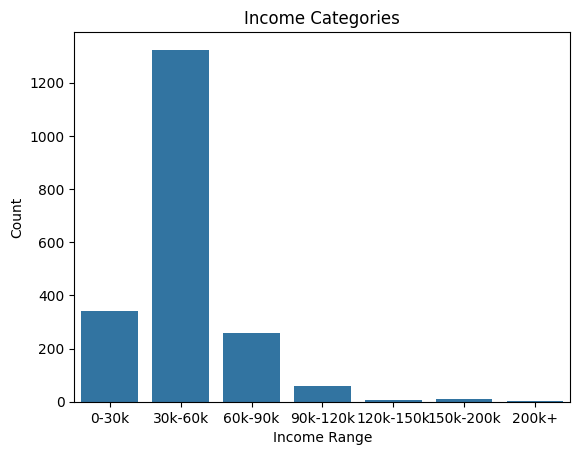

In [56]:
# Create bins for income categories
bins = [0, 30000, 60000, 90000, 120000, 150000, 200000, float('inf')]
labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k-200k', '200k+']
users_data_df['income_category'] = pd.cut(users_data_df['yearly_income'], bins=bins, labels=labels)

# Plot bar plot
sns.countplot(x=users_data_df['income_category'])
plt.title('Income Categories')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.show()


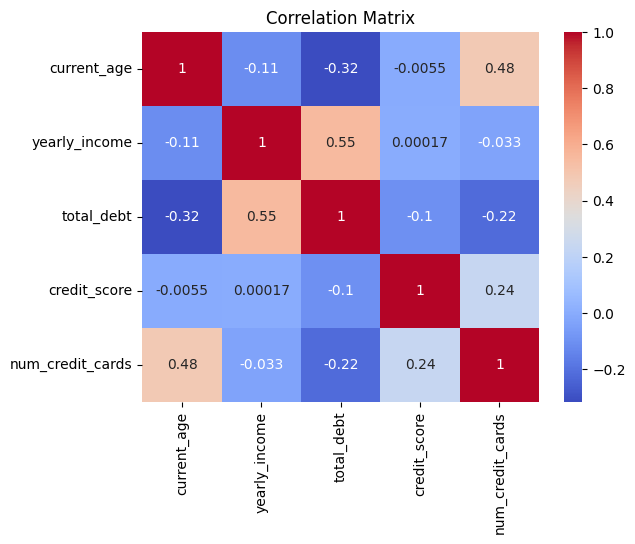

In [64]:
# Correlation matrix to check relationships between numerical features
corr = users_data_df[['current_age', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

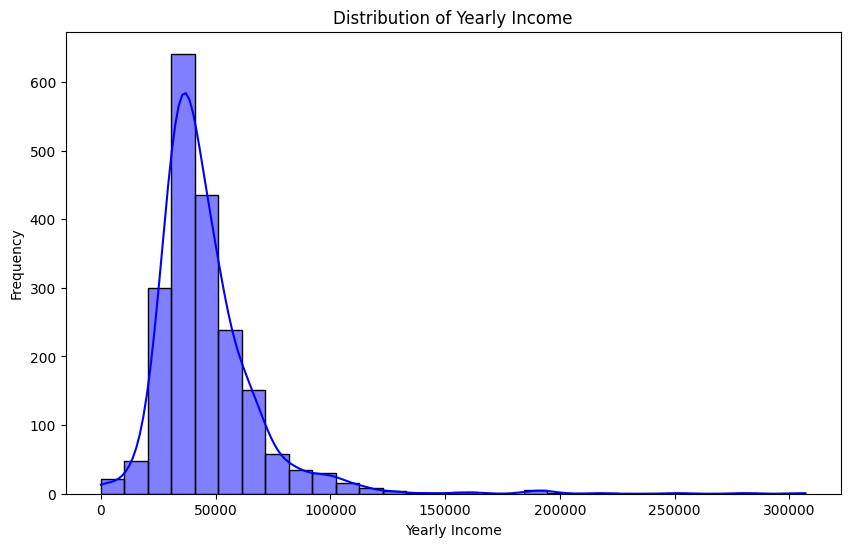

In [70]:
# Plot histogram and density plot (KDE) for yearly income
plt.figure(figsize=(10, 6))
sns.histplot(users_data_df['yearly_income'], kde=True, bins=30, color='blue')
plt.title('Distribution of Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Frequency')
plt.show()

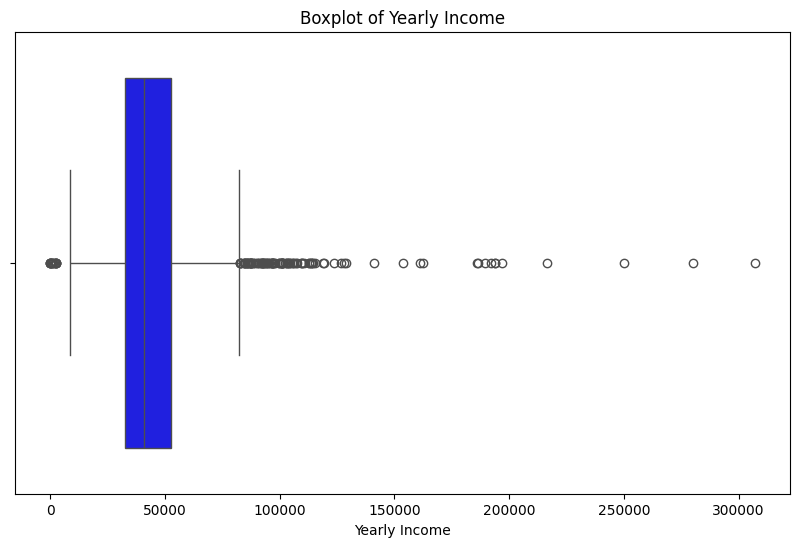

In [69]:
# Boxplot to check for outliers in yearly_income
plt.figure(figsize=(10, 6))
sns.boxplot(x=users_data_df['yearly_income'], color='blue')
plt.title('Boxplot of Yearly Income')
plt.xlabel('Yearly Income')
plt.show()

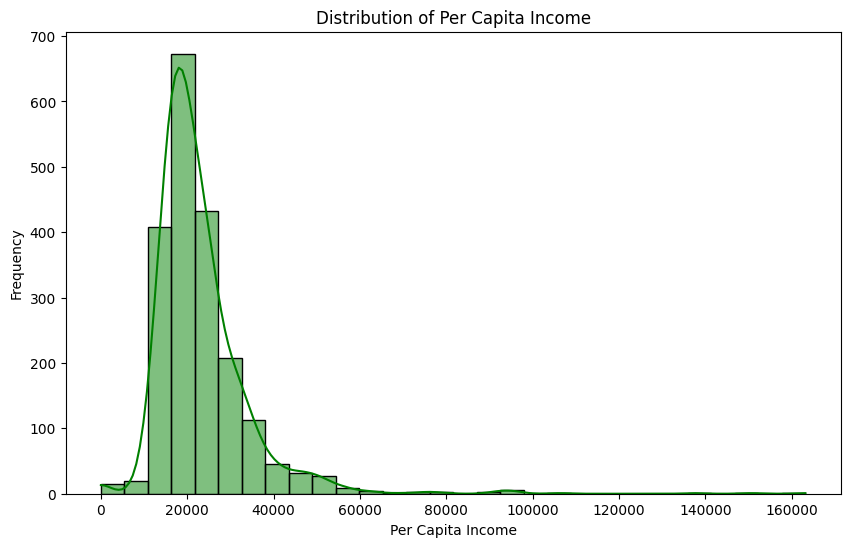

In [71]:
# Plot for per_capita_income
plt.figure(figsize=(10, 6))
sns.histplot(users_data_df['per_capita_income'], kde=True, bins=30, color='green')
plt.title('Distribution of Per Capita Income')
plt.xlabel('Per Capita Income')
plt.ylabel('Frequency')
plt.show()

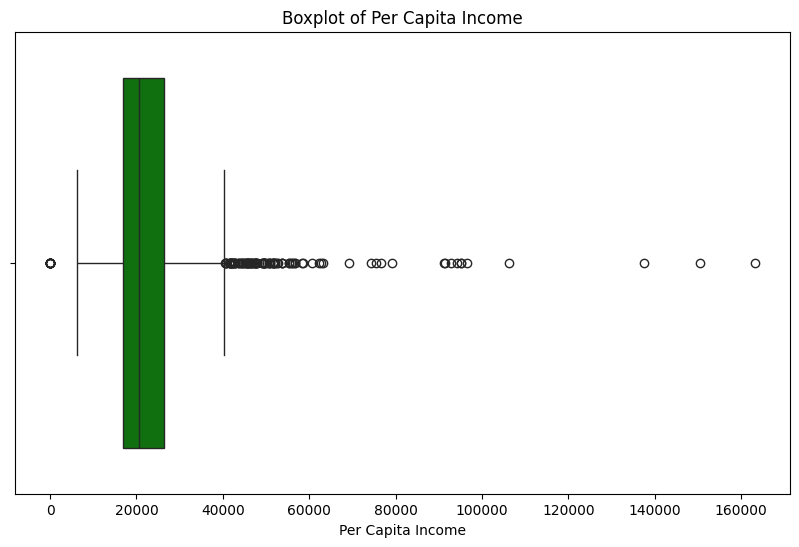

In [72]:
# Boxplot for per_capita_income
plt.figure(figsize=(10, 6))
sns.boxplot(x=users_data_df['per_capita_income'], color='green')
plt.title('Boxplot of Per Capita Income')
plt.xlabel('Per Capita Income')
plt.show()

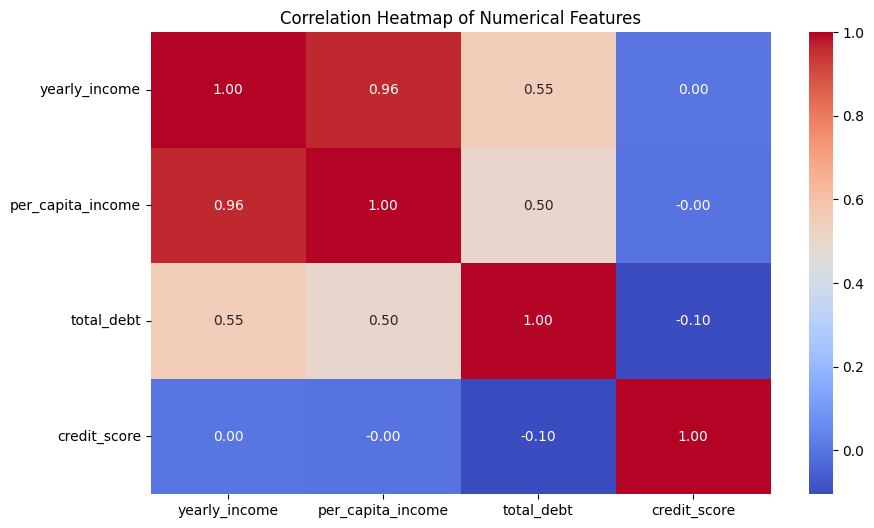

In [73]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
corr = users_data_df[['yearly_income', 'per_capita_income', 'total_debt', 'credit_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

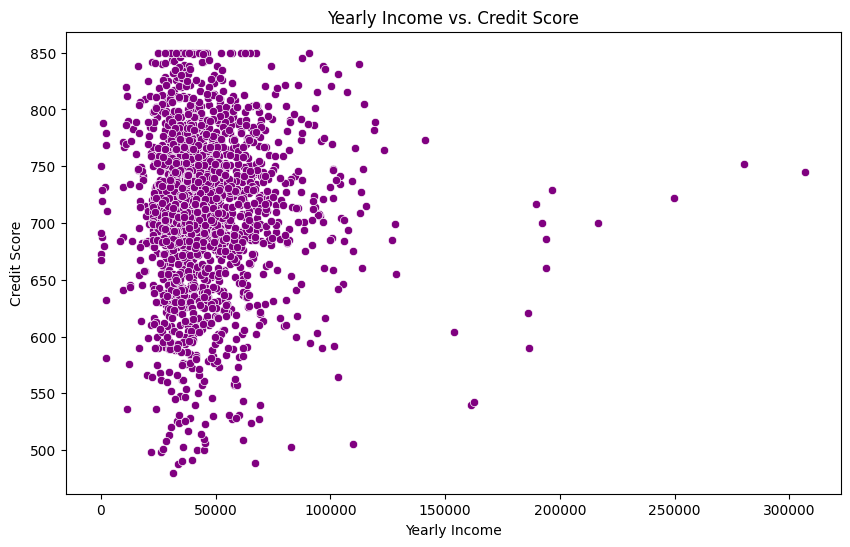

In [74]:
# Scatter plot of yearly income vs. credit score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=users_data_df['yearly_income'], y=users_data_df['credit_score'], color='purple')
plt.title('Yearly Income vs. Credit Score')
plt.xlabel('Yearly Income')
plt.ylabel('Credit Score')
plt.show()

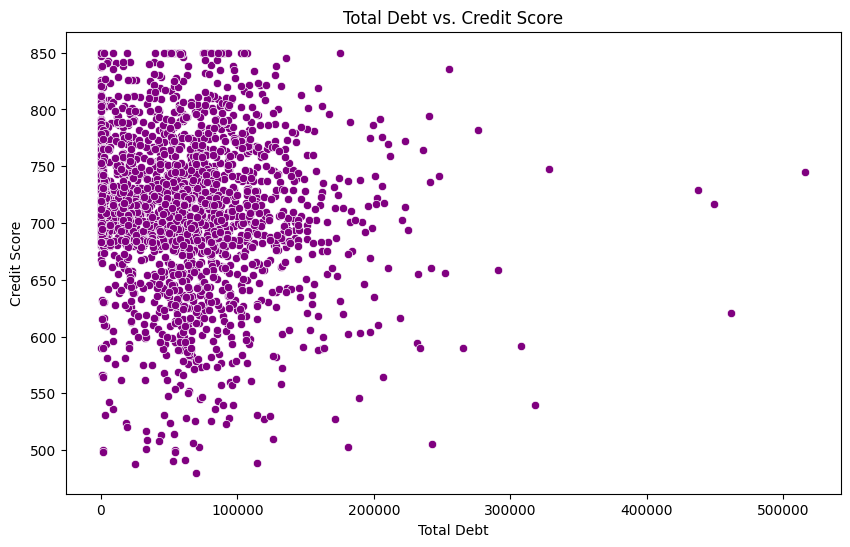

In [75]:
# Scatter plot of total_debt vs. credit score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=users_data_df['total_debt'], y=users_data_df['credit_score'], color='purple')
plt.title('Total Debt vs. Credit Score')
plt.xlabel('Total Debt')
plt.ylabel('Credit Score')
plt.show()

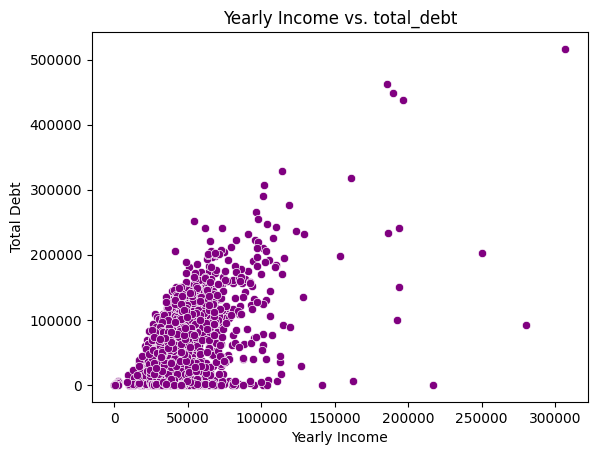

In [76]:
# Scatter plot of yearly income vs. total debt
sns.scatterplot(x=users_data_df['yearly_income'], y=users_data_df['total_debt'], color='purple')
plt.title('Yearly Income vs. total_debt')
plt.xlabel('Yearly Income')
plt.ylabel('Total Debt')
plt.show()

C:\Users\soura\AppData\Local\Temp\ipykernel_9072\3834237004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=users_data_df['gender'], palette='Set2')


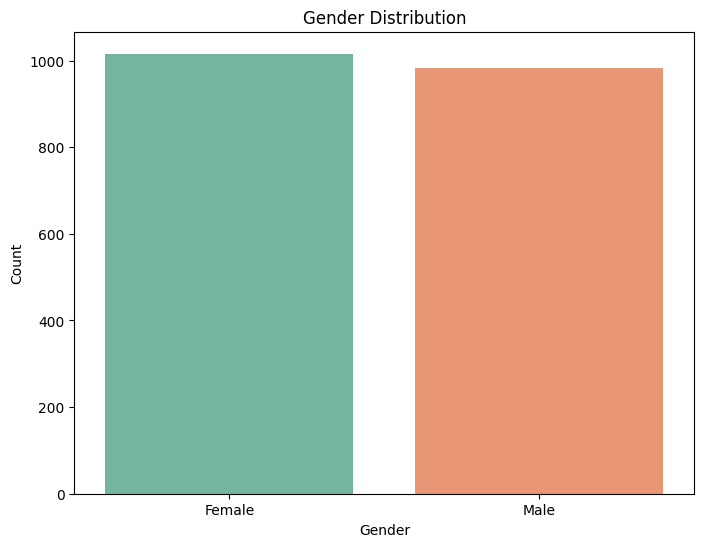

In [77]:
# Bar plot for gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=users_data_df['gender'], palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## Skewness

In [79]:
# Calculate skewness for each numerical column
skewness = users_data_df[['yearly_income', 'per_capita_income', 'total_debt', 'credit_score']].skew()

# Print the skewness values
print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
yearly_income        3.447004
per_capita_income    3.965626
total_debt           1.811097
credit_score        -0.452659
dtype: float64


Yearly Income (3.45): Highly positively skewed, meaning most people have lower yearly incomes, but there are a few with very high yearly incomes.

Per Capita Income (3.97): Also highly positively skewed, similar to yearly income.

Total Debt (1.81): Moderately positively skewed, indicating that most individuals have lower debt but a few have high debt.

Credit Score (-0.45): Slightly negatively skewed, meaning most of the credit scores are on the higher side, but there is a small tail on the lower side.

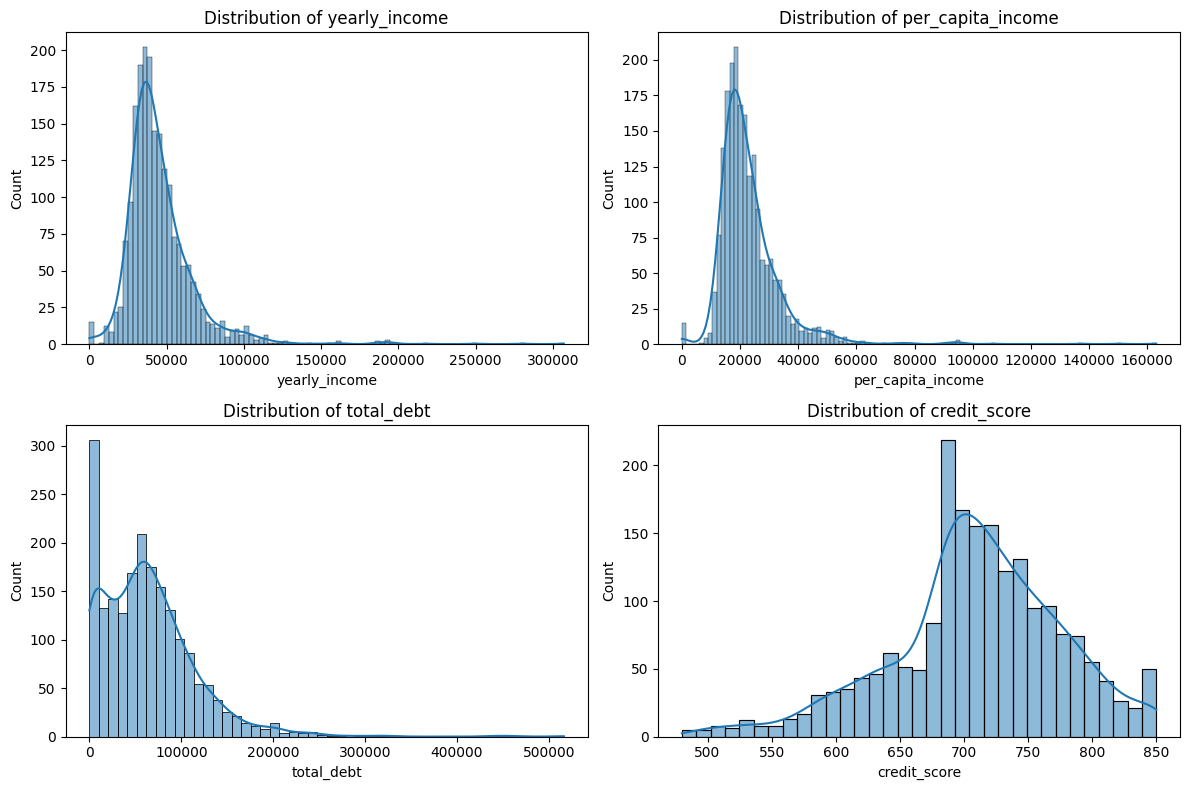

In [80]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot histograms and KDEs for the numerical columns
numerical_cols = ['yearly_income', 'per_capita_income', 'total_debt', 'credit_score']

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(users_data_df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

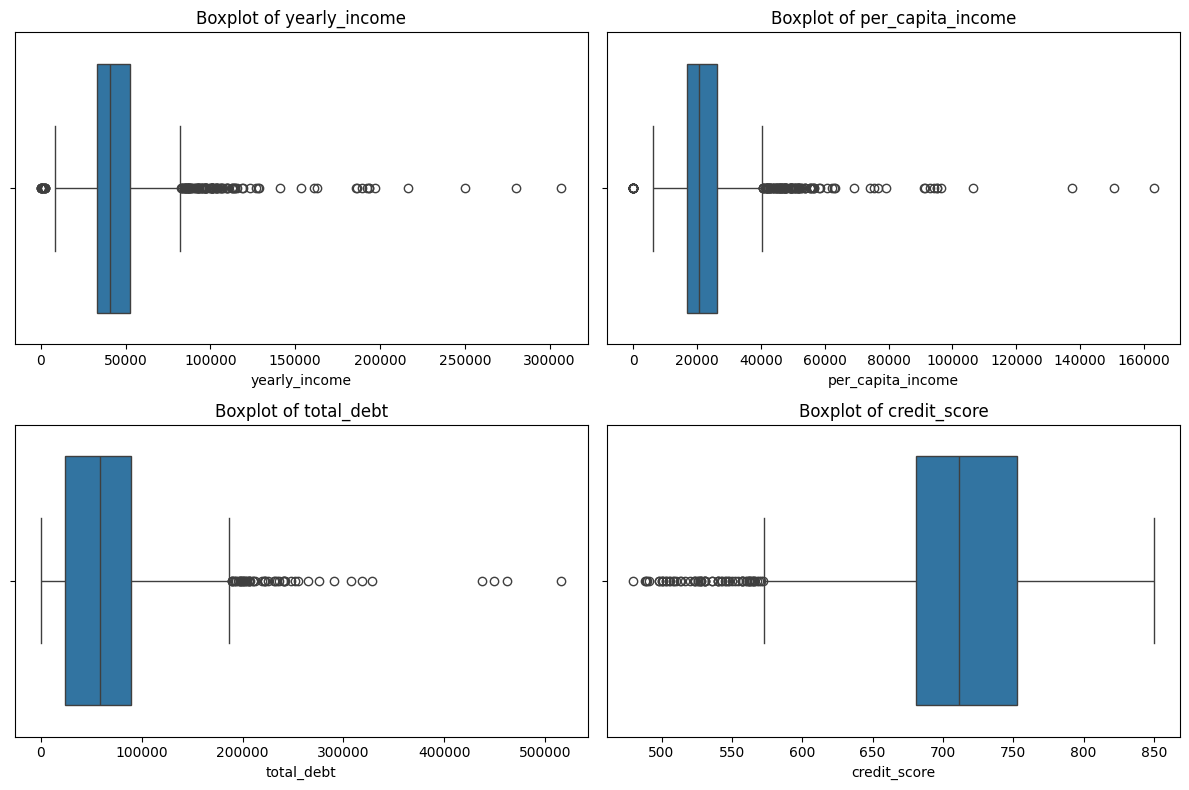

In [81]:
plt.figure(figsize=(12, 8))

# Plot boxplots for the numerical columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=users_data_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


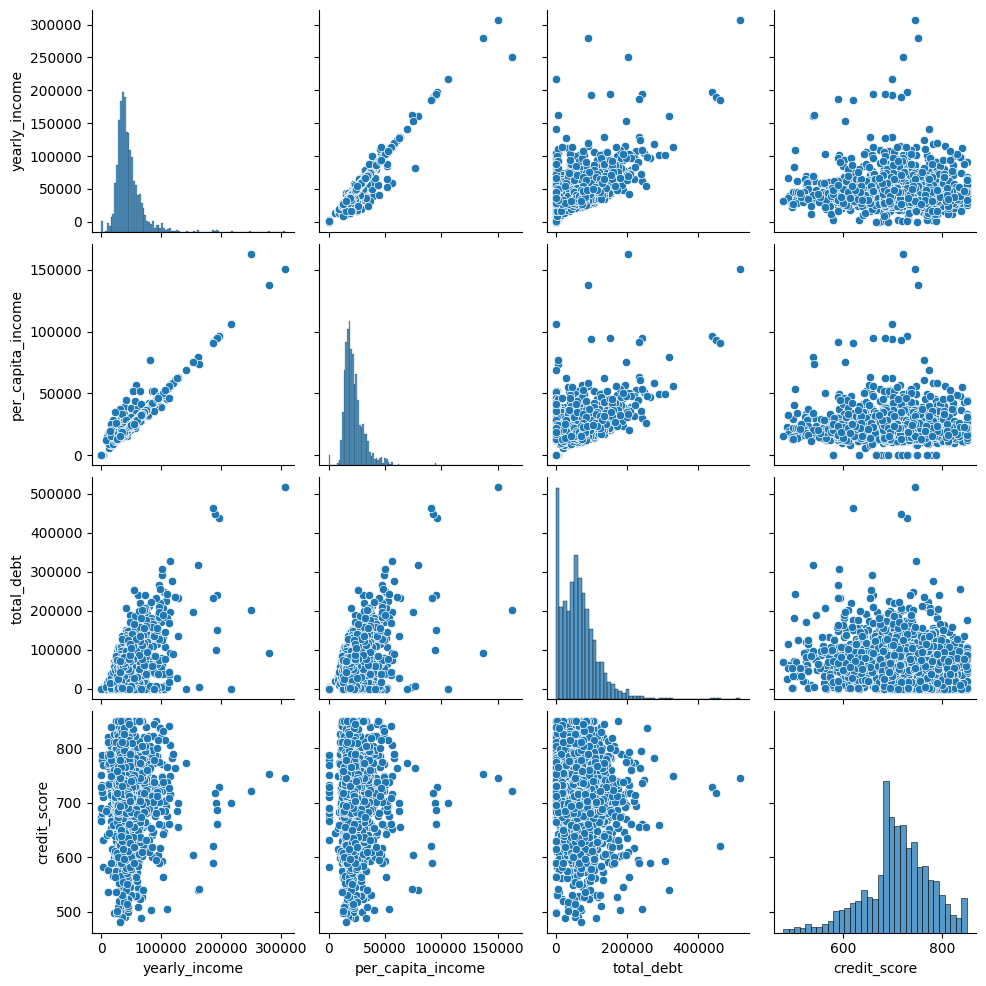

In [82]:
sns.pairplot(users_data_df[numerical_cols])
plt.show()


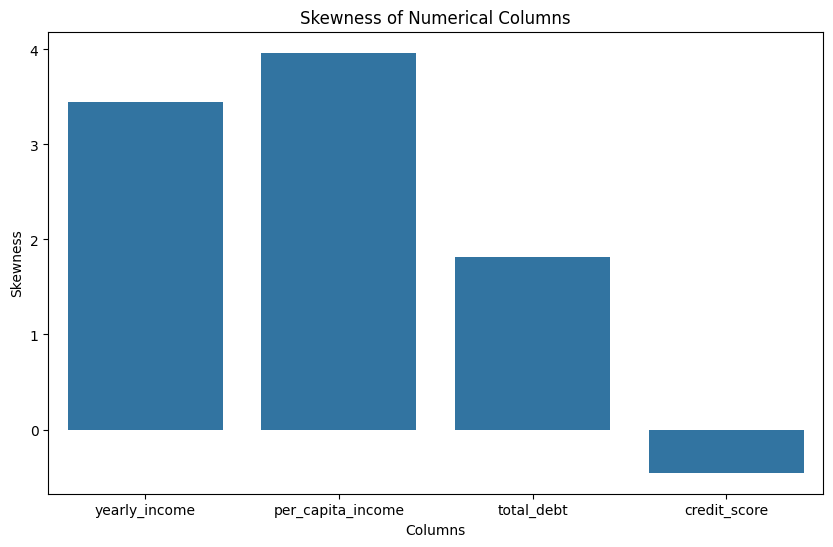

In [83]:
# Calculate skewness
skew_values = users_data_df[numerical_cols].skew()

# Plot skewness for each numerical column
plt.figure(figsize=(10, 6))
sns.barplot(x=skew_values.index, y=skew_values.values)
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.show()


## Handling Skewness

In [84]:
# Apply log transformation to positive skewed columns
users_data_df['log_yearly_income'] = np.log1p(users_data_df['yearly_income'])
users_data_df['log_per_capita_income'] = np.log1p(users_data_df['per_capita_income'])
users_data_df['log_total_debt'] = np.log1p(users_data_df['total_debt'])


# Check skewness after transformation
log_skewness = users_data_df[['log_yearly_income', 'log_per_capita_income', 'log_total_debt']].skew()
print("Skewness after log transformation:")
print(log_skewness)

Skewness after log transformation:
log_yearly_income       -7.244227
log_per_capita_income   -8.841932
log_total_debt          -2.894450
dtype: float64


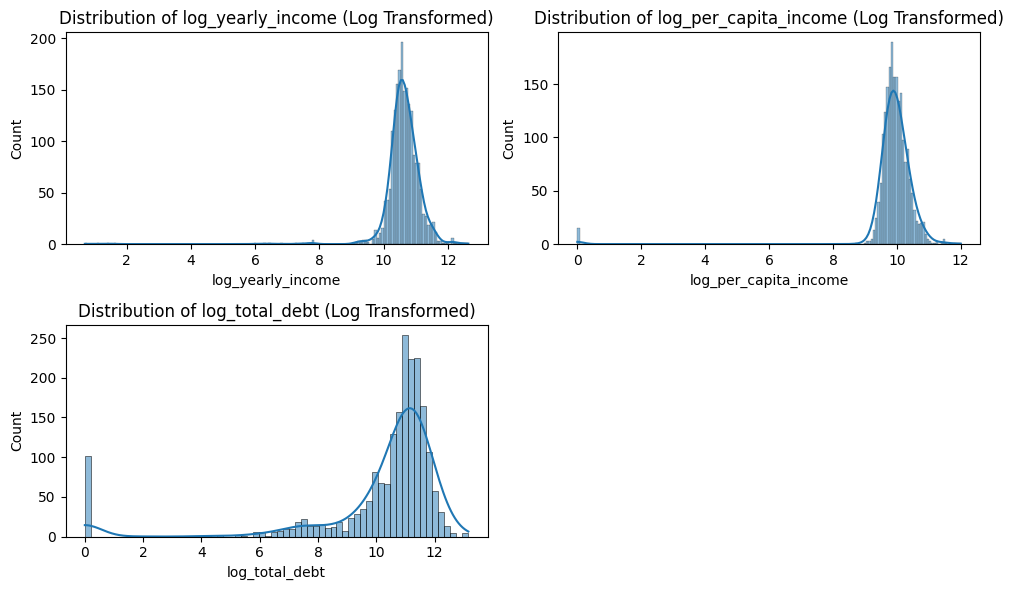

In [111]:
# Plot histograms and KDE for log-transformed numerical columns
log_numerical_cols = ['log_yearly_income', 'log_per_capita_income', 'log_total_debt']

plt.figure(figsize=(10, 6))

for i, col in enumerate(log_numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(users_data_df[col], kde=True)
    plt.title(f'Distribution of {col} (Log Transformed)')

plt.tight_layout()
plt.show()


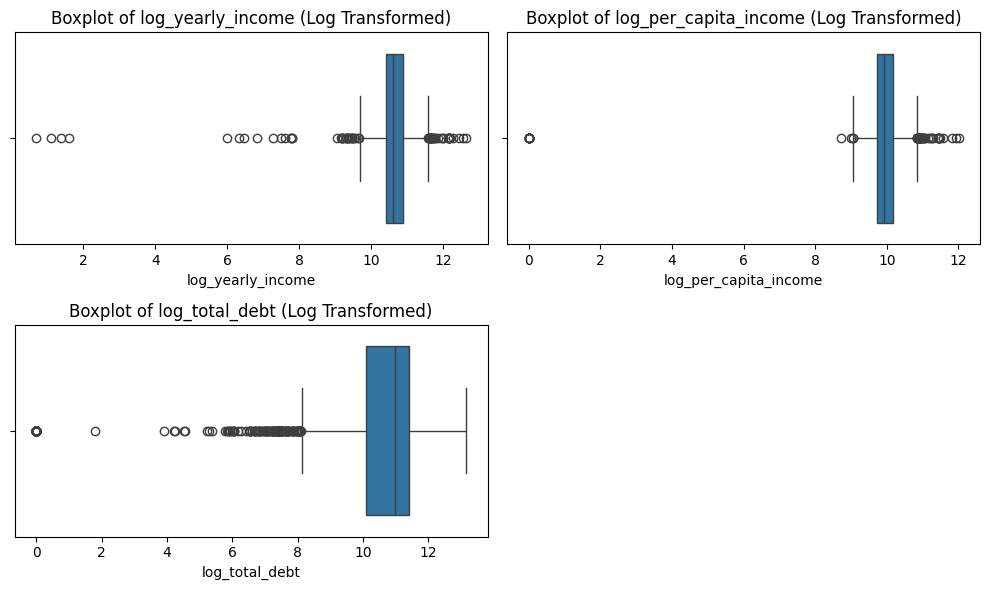

In [113]:
plt.figure(figsize=(10, 6))

for i, col in enumerate(log_numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=users_data_df[col])
    plt.title(f'Boxplot of {col} (Log Transformed)')

plt.tight_layout()
plt.show()


Box-Cox Transformation (only works with positive values)

This can help make the data more normally distributed

In [94]:
from scipy import stats

# Apply Box-Cox transformation
users_data_df['boxcox_yearly_income'], _ = stats.boxcox(users_data_df['yearly_income'] + 1)
users_data_df['boxcox_per_capita_income'], _ = stats.boxcox(users_data_df['per_capita_income'] + 1)
users_data_df['boxcox_total_debt'], _ = stats.boxcox(users_data_df['total_debt'] + 1)

# Check skewness after Box-Cox transformation
boxcox_skew_values = users_data_df[['boxcox_yearly_income', 'boxcox_per_capita_income', 'boxcox_total_debt']].skew()
print("Skewness after Box-Cox transformation:")
print(boxcox_skew_values)


Skewness after Box-Cox transformation:
boxcox_yearly_income        0.461749
boxcox_per_capita_income    0.719416
boxcox_total_debt          -0.439143
dtype: float64


Yeo-Johnson Transformation (works for both positive and negative values)

In [89]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
users_data_df[['yeo_yearly_income', 'yeo_per_capita_income', 'yeo_total_debt']] = pt.fit_transform(
    users_data_df[['yearly_income', 'per_capita_income', 'total_debt']]
)

# Check skewness after Yeo-Johnson transformation
yeo_skew_values = users_data_df[['yeo_yearly_income', 'yeo_per_capita_income', 'yeo_total_debt']].skew()
print("Skewness after Yeo-Johnson transformation:")
print(yeo_skew_values)


Skewness after Yeo-Johnson transformation:
yeo_yearly_income        0.461749
yeo_per_capita_income    0.719416
yeo_total_debt          -0.439143
dtype: float64


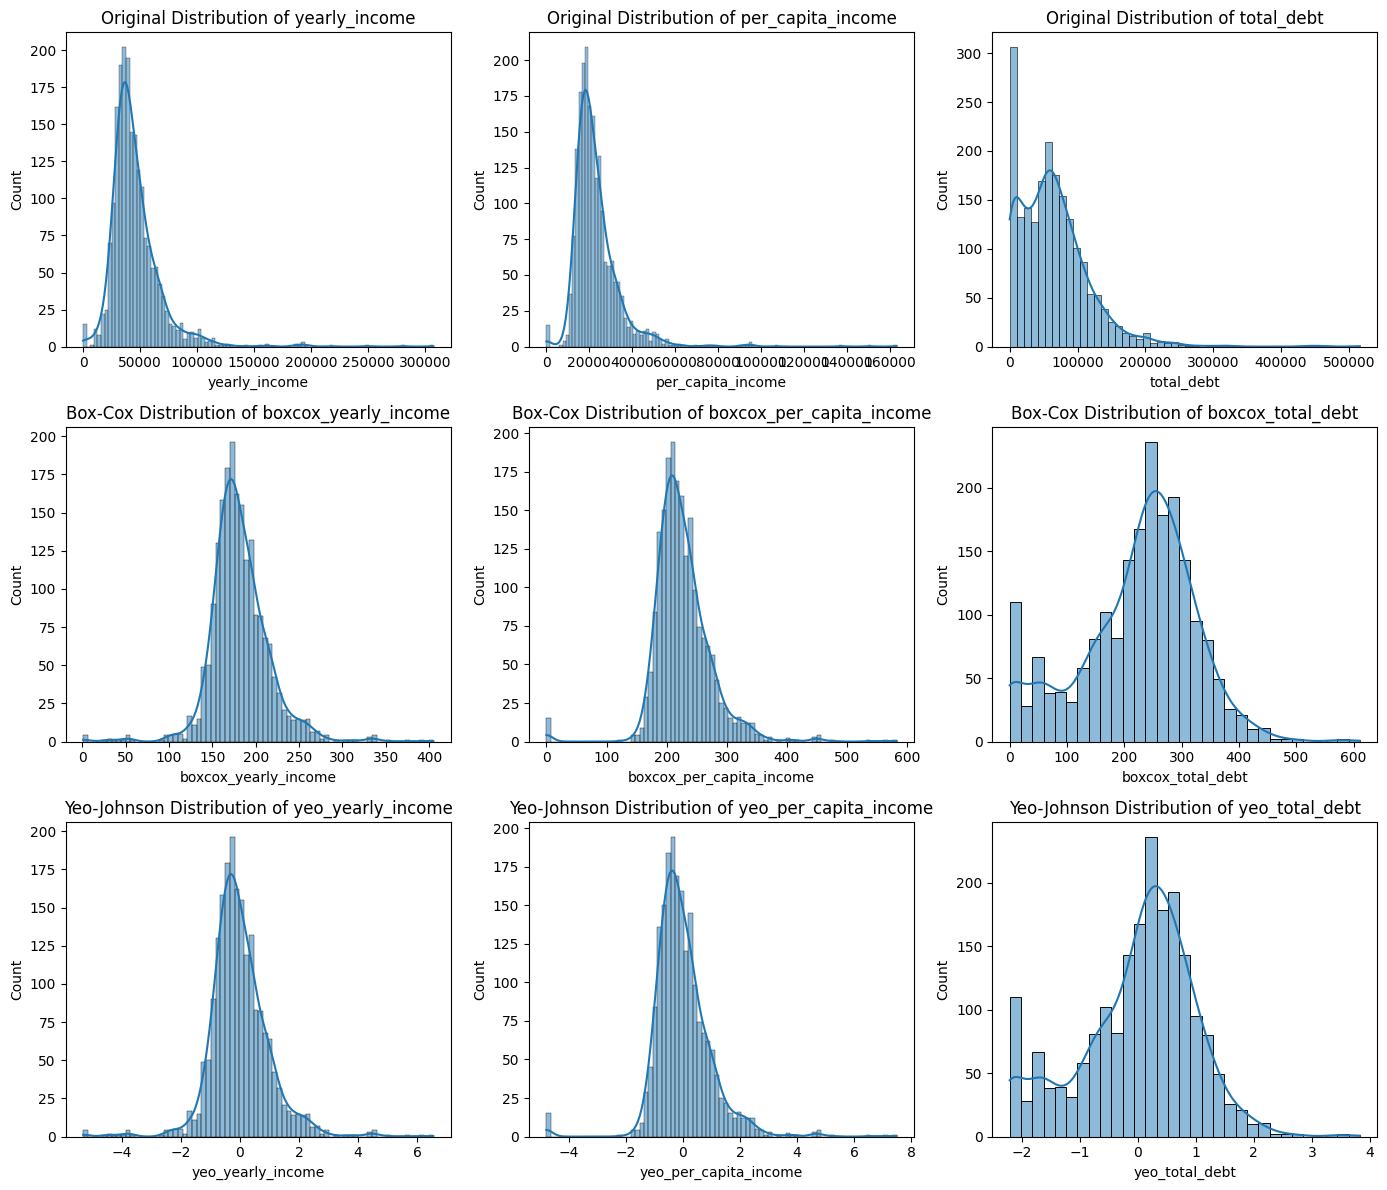

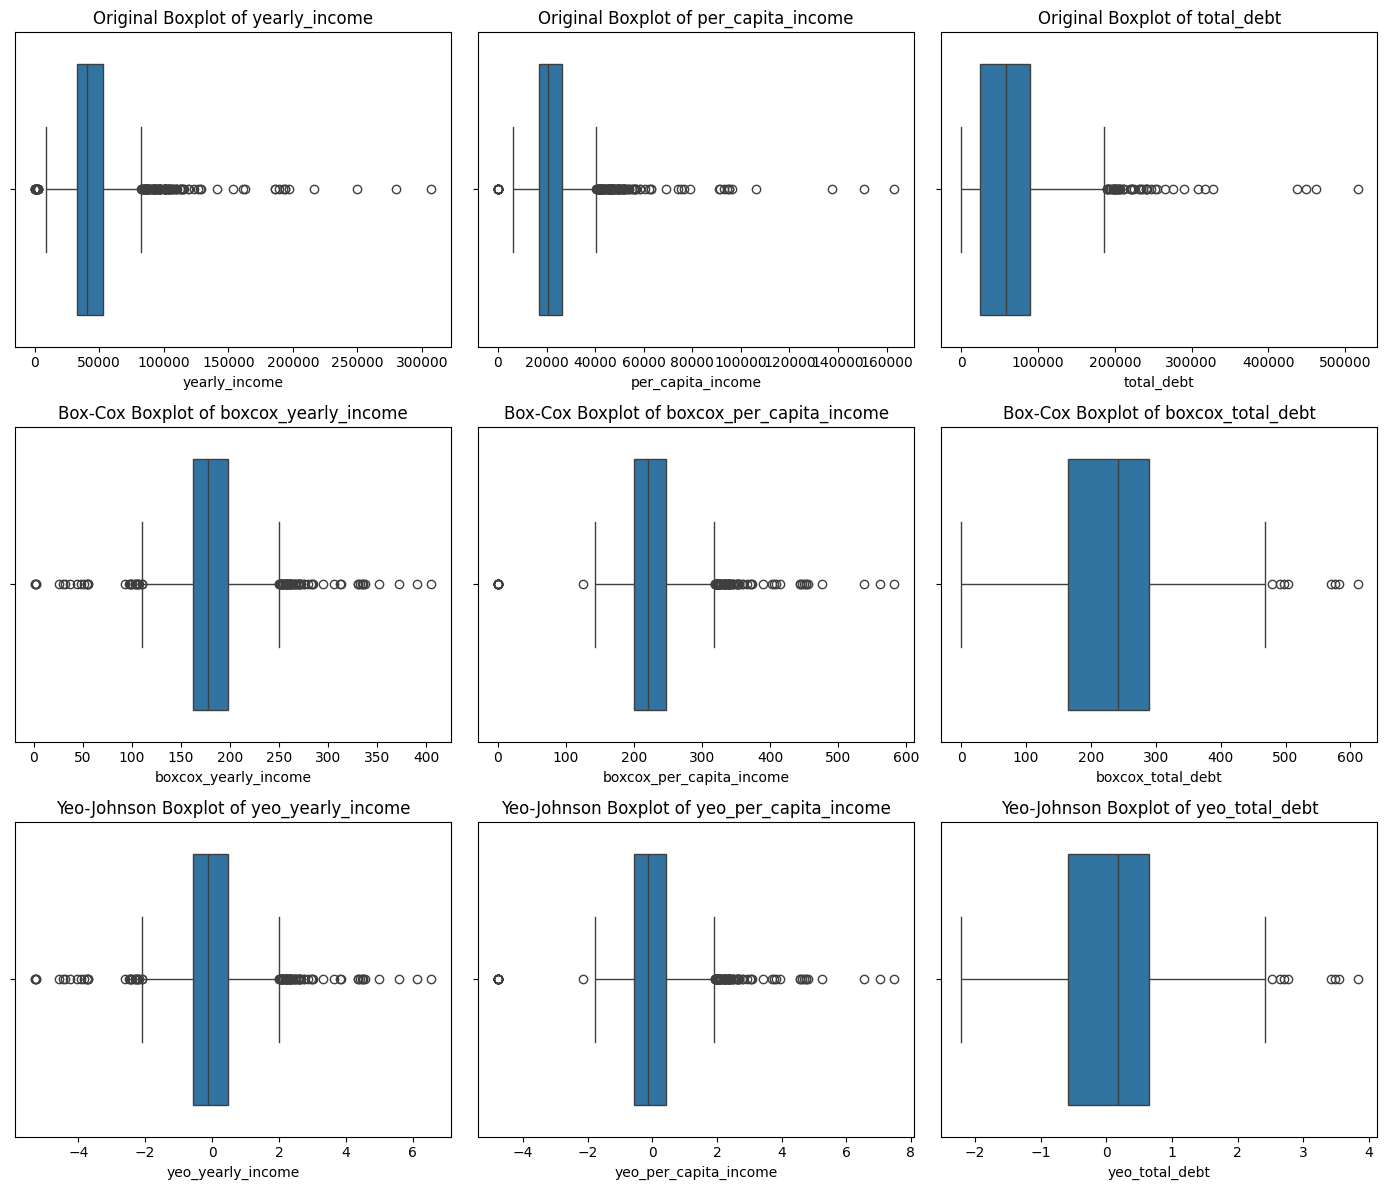

In [114]:
# Columns for original (skewed) data
original_columns = ['yearly_income', 'per_capita_income', 'total_debt']

# Columns for transformed data
transformed_columns = ['boxcox_yearly_income', 'boxcox_per_capita_income', 'boxcox_total_debt', 
                       'yeo_yearly_income', 'yeo_per_capita_income', 'yeo_total_debt']

# Plot original (skewed) and transformed data (Box-Cox and Yeo-Johnson)
plt.figure(figsize=(14, 12))

# Original (Skewed) Data
for i, col in enumerate(original_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(users_data_df[col], kde=True)
    plt.title(f'Original Distribution of {col}')

# Box-Cox Transformed Data
for i, col in enumerate(transformed_columns[:3], 4):  # Box-Cox data is in the first 3
    plt.subplot(3, 3, i)
    sns.histplot(users_data_df[col], kde=True)
    plt.title(f'Box-Cox Distribution of {col}')

# Yeo-Johnson Transformed Data
for i, col in enumerate(transformed_columns[3:], 7):  # Yeo-Johnson data starts from the 4th column
    plt.subplot(3, 3, i)
    sns.histplot(users_data_df[col], kde=True)
    plt.title(f'Yeo-Johnson Distribution of {col}')

plt.tight_layout()
plt.show()

# Boxplots for original (skewed) and transformed data
plt.figure(figsize=(14, 12))

# Original (Skewed) Data
for i, col in enumerate(original_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=users_data_df[col])
    plt.title(f'Original Boxplot of {col}')

# Box-Cox Transformed Data
for i, col in enumerate(transformed_columns[:3], 4):  # Box-Cox data
    plt.subplot(3, 3, i)
    sns.boxplot(x=users_data_df[col])
    plt.title(f'Box-Cox Boxplot of {col}')

# Yeo-Johnson Transformed Data
for i, col in enumerate(transformed_columns[3:], 7):  # Yeo-Johnson data
    plt.subplot(3, 3, i)
    sns.boxplot(x=users_data_df[col])
    plt.title(f'Yeo-Johnson Boxplot of {col}')

plt.tight_layout()
plt.show()


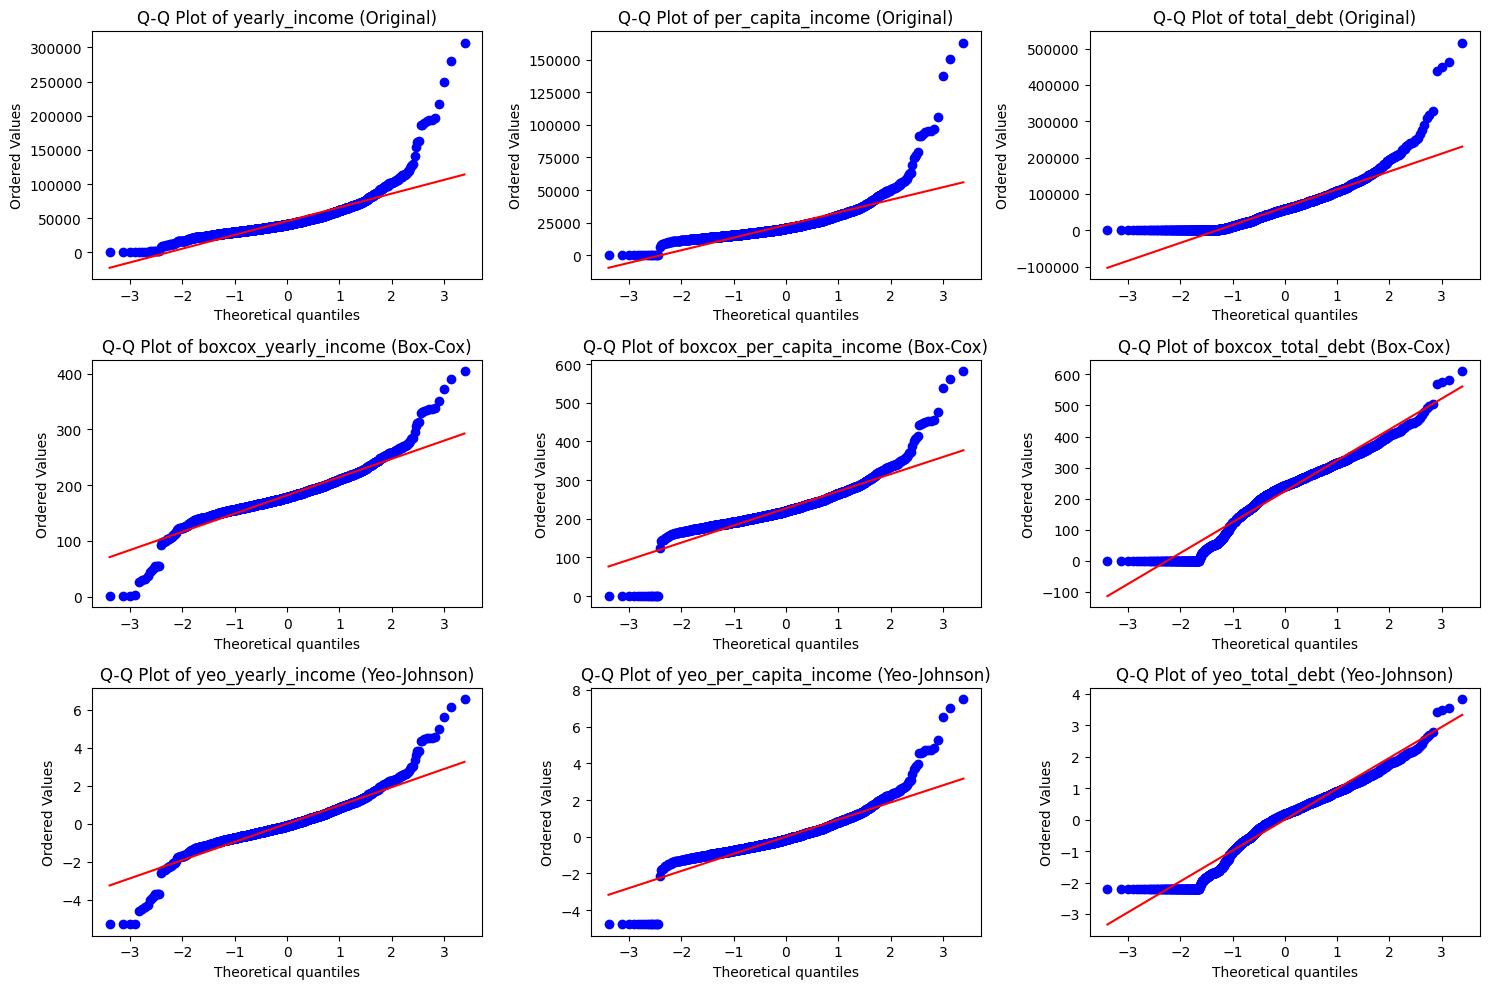

In [106]:
import scipy.stats as stats

# Columns for original (skewed) data
original_columns = ['yearly_income', 'per_capita_income', 'total_debt']

# Columns for transformed data (Box-Cox and Yeo-Johnson)
transformed_columns = ['boxcox_yearly_income', 'boxcox_per_capita_income', 'boxcox_total_debt', 
                       'yeo_yearly_income', 'yeo_per_capita_income', 'yeo_total_debt']

# Q-Q Plot for Original Data (Skewed)
plt.figure(figsize=(15, 10))

for i, col in enumerate(original_columns, 1):
    plt.subplot(3, 3, i)
    stats.probplot(users_data_df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} (Original)')

# Q-Q Plot for Box-Cox Transformed Data
for i, col in enumerate(transformed_columns[:3], 4):  # Box-Cox data
    plt.subplot(3, 3, i)
    stats.probplot(users_data_df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} (Box-Cox)')

# Q-Q Plot for Yeo-Johnson Transformed Data
for i, col in enumerate(transformed_columns[3:], 7):  # Yeo-Johnson data
    plt.subplot(3, 3, i)
    stats.probplot(users_data_df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} (Yeo-Johnson)')

plt.tight_layout()
plt.show()
